# Homework 
Evelina Teran & Kevin Smith

In [6]:
from scipy.sparse import lil_matrix
from scipy.spatial.distance import euclidean
import platform
import os
from PIL import Image
import numpy as np
from sklearn.cluster import SpectralClustering
import matplotlib.pyplot as plt

## Problem 1

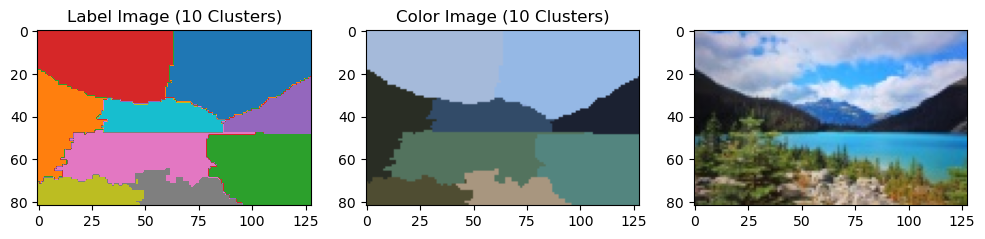

In [7]:
file_path = os.getcwd() + "/"
if platform.system() == "Windows":
    file_path = file_path.replace("/", "\\")

def spectral_clustering_and_coloring(image, affinity_matrix, n_clusters):
    # Perform spectral clustering
    clustering = SpectralClustering(n_clusters=n_clusters, affinity='precomputed', assign_labels='discretize', random_state=42)
    labels = clustering.fit_predict(affinity_matrix)

    # Reshape the labels into an image
    label_image = labels.reshape(image.shape[0], image.shape[1])

    # Initialize the color image
    color_image = np.zeros_like(image)

    # Compute the mean color for each cluster and assign it to the pixels in that cluster
    for cluster in range(n_clusters):
        cluster_indices = np.where(labels == cluster)[0]
        mean_color = np.mean(image.reshape(-1, 3)[cluster_indices], axis=0)
        color_image.reshape(-1, 3)[cluster_indices] = mean_color


    return label_image, color_image  

image = Image.open(file_path + "scene2.jpg")
imagearr = np.asarray(image) #[row][col][rgb]
imagearr = imagearr/255
cols, rows = image.size
A = lil_matrix((10496,10496))
sigma = .1




for i in range(rows): # col
    for j in range(cols): # row
        neighbors = [(i-1, j), (i+1, j), (i, j-1), (i, j+1)]
        pixel_index = i * cols + j

        for n_i, n_j in neighbors:
                if 0 <= n_i < rows and 0 <= n_j < cols:
                    neighbor_index = n_i * cols + n_j
                    # Calculate the Euclidean distance between the RGB values of the two pixels
                    dist = euclidean(imagearr[i, j], imagearr[n_i, n_j])
                    # Calculate the affinity
                    affinity = np.exp(-dist**2 / (sigma**2))
                    # Store the affinity in the matrix
                    A[pixel_index, neighbor_index] = affinity

# Perform spectral clustering and coloring with 10 clusters
label_image_10, color_image_10 = spectral_clustering_and_coloring(imagearr, A, n_clusters=10)

# Display the label image and color image for 10 clusters
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.imshow(label_image_10, cmap='tab10')
plt.title('Label Image (10 Clusters)')
plt.subplot(1, 3, 2)
plt.imshow(color_image_10)
plt.title('Color Image (10 Clusters)')
plt.subplot(1, 3, 3)
plt.imshow(image)
plt.show()


## Problem 2

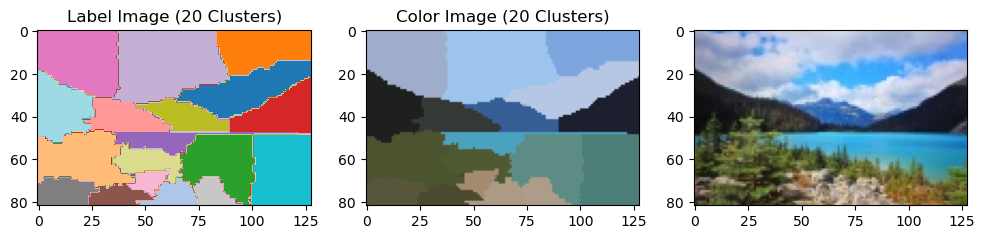

In [8]:
# Repeat the process with 20 clusters
label_image_20, color_image_20 = spectral_clustering_and_coloring(imagearr, A, n_clusters=20)

# Display the label image and color image for 20 clusters
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.imshow(label_image_20, cmap='tab20')
plt.title('Label Image (20 Clusters)')
plt.subplot(1, 3, 2)
plt.imshow(color_image_20)
plt.title('Color Image (20 Clusters)')
plt.subplot(1, 3, 3)
plt.imshow(image)
plt.show()
